<a href="https://colab.research.google.com/github/merinjv/CS301/blob/main/MLE_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

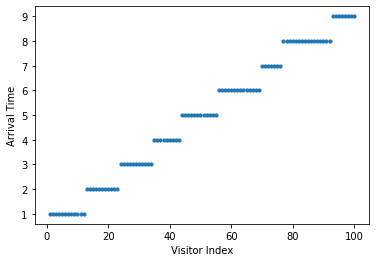

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import random

num_visits = 100;
l = 10;
time_acc_y = [];
time_y = [];
visits_x=[];
t = 0;
plt.xlabel('Visitor Index');
plt.ylabel('Arrival Time');

for n in range(1,num_visits+1):
  probability = random.random();
  val = abs((np.log(1-probability))/l);
  t+=val;
  time_y.append(val);
  time_acc_y.append(math.ceil(t));
  visits_x.append(n);
  
plt.scatter(visits_x,time_acc_y,s=10);



We are given that there are a 100 visits to our youtube channel and can assume that there is a Poisson distribution with a mean of 10 visits per minute. Therefore, we start off by creating two variables, one for number of visits (num_visits) and the other for the mean/lambda (l). Since we are creating a plot of arrival time vs visits we must create two lists as well one for time (time_acc_y) and one for visits (visits_x). The list of time_acc_y is the accumulated time while time_y is the non accumulated time which we will use in the next problem. Next we have declared a variable t, which will be explained later on. Now we must create a loop that goes through each possible number of visits which would be from having one visitor to having a 100. Then, inside that loop we need to randomly generate a probability, which is why the random() function is used giving us a random value from 0.0 to 1.0. We need to find the probability mass function in the poisson distribution as it tells us the probability distribution of a discrete random variable. To attain this value we must take the inverse of the cumulative distribution function. The cumulative distribution function provides the sum of the probabilities to a random variable x. Therefore, using the cdf function $1-e^{-\lambda x}$ we take its inverse to find the quantile which can help us determine how many visitors were above or below a certain time. The quantile function, therefore, is $\frac{-ln(1-p)}{\lambda}$. We achieve this implementation by using the log function and taking the log of 1 minus the probability and then dividing this value by l (our lambda). Then using this function we take its absolute value as time can not be negative. Then we add it to the variable t, which was created before as it provides the accumulated time. Then t is appended into the time_acc_y list while n is appended into the visits list. This is then ploted by using the scatter function, giving us a plot of the arrival time vs the visitor index.

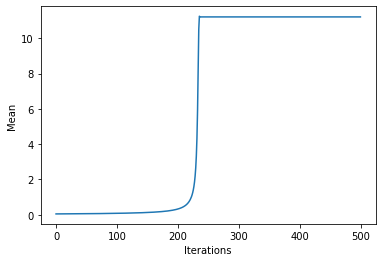

In [79]:
learning_rate = 0.001;

L = random.randint(10,25);

mean = [];
iterations = [];

plt.xlabel('Iterations');
plt.ylabel('Mean');

def loss_function(L: float):
  loss = len(time_y) - (1/L) * sum(time_y);
  return loss;

for n in range (0,500):
  L = L-(learning_rate*loss_function(L));
  mean.append(1/L);
  iterations.append(n);

plt.plot(iterations,mean);


Using the information generated by problem one, we are asked to create a plot that will estimate the Poisson distribution according to the Maximum Likelihood criterion. In order to do this we will implement the gradient descent algorithm, $w_{k+1} = w_{k} - {\eta\triangledown}_{w}L(w_{k})$ , which will help us determine the optimal mean. To start off we must define the learning rate (learning_rate) or ${\eta}$ in the equation, which we have set to 0.001. Then we must provide a starting value for $w$ which is defined as L. We will give L a random value between 10 and 25. I have at 10 since, in the previous problem, it was defined as the mean. Next we will initiallize to lists one for the means and one for the iterations. Once this is done, we will now define the loss function, which is found by minimizing the negative log likelihood. Therefore we take the derivative of $-ln(\prod_{i=1}^{n} \frac{e^{-\lambda}\lambda ^{x_{i}}}{x_{i}!})$ , which will become $n - \frac{1}{\lambda}\sum_{i=1}^{n}x_{i}$ . To implement this we create a function called loss_function with the parameter of L which will be the current mean. Using this value we find the loss by taking the length of the time list from the previous problem, which is $n$ in our equation and subtracting it by the inverse of the current mean (L), which is lambda in the equation, times the sum of all the values in the time list from the previous problem. Then we create a loop to iterate till 500 as I have estimated that this will be enough to help us determine the right plot. Inside the loop we now implement the gradient descent algorithm by making the mean equal to the current mean minus the output determined from the loss function times the learning rate. This shall provide a new mean which we will append into the mean list while appending the iteration value to the iteration list. This process will repeat till the iteration reaches 500. Then we will plot the values using the mean list and the iteration list to get a plot of mean vs iterations. 